In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics



Using TensorFlow backend.


In [2]:
Data=pd.read_csv("Final Data.csv")

Data.dtypes

Maximum_Temperature     int64
Minimum_Temperature     int64
Average_Humidity        int64
Rainfall                int64
Total_Case              int64
Pf_Positive             int64
Outbreak               object
dtype: object

In [3]:
Data.isnull().sum()

Maximum_Temperature    0
Minimum_Temperature    0
Average_Humidity       0
Rainfall               0
Total_Case             0
Pf_Positive            0
Outbreak               0
dtype: int64

In [4]:
Data["Outbreak"].replace(('Yes', 'No'), (1, 0), inplace=True)


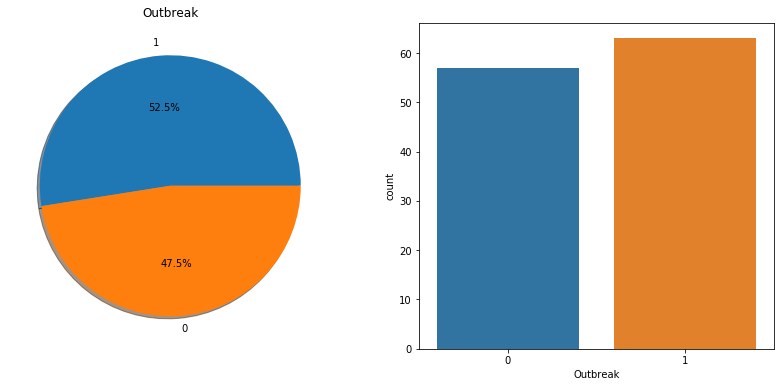

In [5]:
f, ax = plt.subplots(1,2,figsize=(14,6))
Data["Outbreak"].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Outbreak')
ax[0].set_ylabel('')
sns.countplot('Outbreak', data=Data, ax=ax[1])
plt.show()

In [6]:
features = Data[['Maximum_Temperature','Minimum_Temperature','Average_Humidity','Rainfall','Total_Case','Pf_Positive']]
features.describe()

,Maximum_Temperature,Minimum_Temperature,Average_Humidity,Rainfall,Total_Case,Pf_Positive
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,36.158333,16.783333,64.358333,68.700000,444.625000,16.216667
std,6.493689,7.516015,14.633216,92.792042,582.048455,26.048172
min,24.000000,3.000000,22.000000,3.000000,0.000000,0.000000
25%,31.000000,9.000000,57.000000,8.000000,37.000000,0.000000
50%,37.000000,17.000000,68.000000,18.000000,230.000000,4.000000
75%,42.000000,25.000000,76.000000,80.750000,443.500000,22.000000
max,50.000000,26.000000,85.000000,314.000000,2103.000000,106.000000


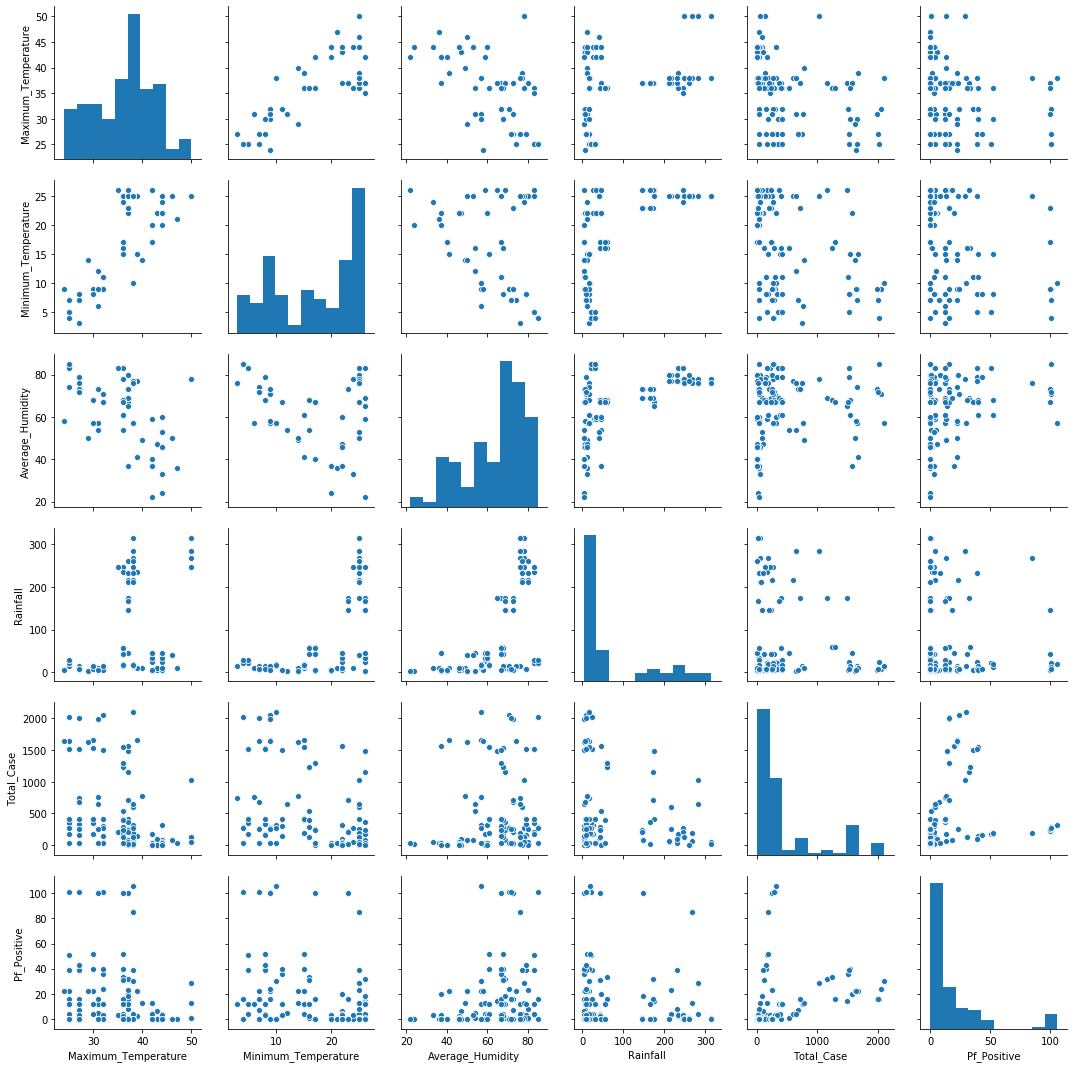

In [7]:
# create a pairplot
sns.pairplot(features)
plt.savefig("pairplot")

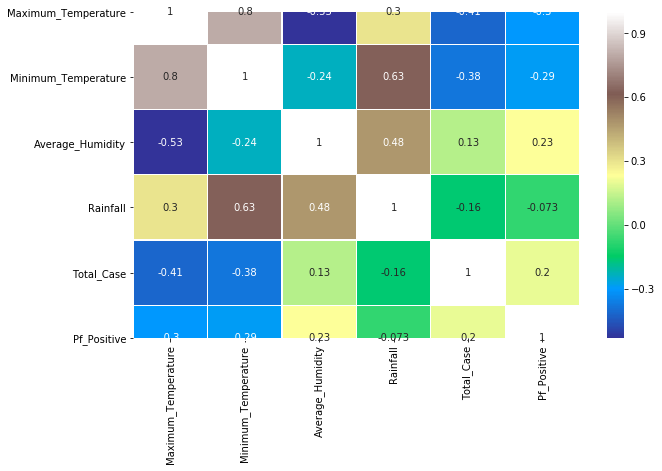

In [8]:
# create a correlation heatmap
sns.heatmap(features.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.savefig("heatmap")

In [9]:
X = np.asarray(Data[['Maximum_Temperature','Minimum_Temperature','Average_Humidity','Rainfall']])
X[0:5]



array([[27,  3, 76, 16],
       [31,  6, 57, 11],
       [40, 14, 49, 11],
       [44, 20, 24,  4],
       [47, 21, 36, 11]], dtype=int64)

In [10]:
y = np.asarray(Data['Outbreak'])
y [0:5]

array([1, 1, 1, 0, 0], dtype=int64)

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (96, 4) (96,)
Test set: (24, 4) (24,)


# SVM

In [12]:
from sklearn import svm
clf = svm.SVC(kernel='linear',gamma="auto")
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.75


# Random Forest

In [13]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7083333333333334


# Decision Tree

In [14]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5833333333333334


# Ann 

In [32]:
classifier = Sequential()

In [33]:
classifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'relu', input_dim = 4))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=4, units=3, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [34]:
classifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=3, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [35]:
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [36]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [37]:
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
96/96 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5104
Epoch 2/100
96/96 [==============================] - 0s 177us/step - loss: 0.6929 - accuracy: 0.5104
Epoch 3/100
96/96 [==============================] - 0s 229us/step - loss: 0.6929 - accuracy: 0.5104
Epoch 4/100
96/96 [==============================] - 0s 219us/step - loss: 0.6930 - accuracy: 0.5104
Epoch 5/100
96/96 [==============================] - 0s 239us/step - loss: 0.6927 - accuracy: 0.5104
Epoch 6/100
96/96 [==============================] - 0s 239us/step - loss: 0.6924 - accuracy: 0.5104
Epoch 7/100
96/96 [==============================] - 0s 437us/step - loss: 0.6922 - accuracy: 0.5104
Epoch 8/100
96/96 [==============================] - 0s 271us/step - loss: 0.6920 - accuracy: 0.5104
Epoch 9/100
96/96 [==============================] - 0s 291us/step - loss: 0.6915 - accuracy: 0.5104
Epoch 10/100
96/96 [==============================] - 0s 239us/step - loss: 0.6910 - accuracy

96/96 [==============================] - 0s 208us/step - loss: 0.5352 - accuracy: 0.7604
Epoch 82/100
96/96 [==============================] - 0s 260us/step - loss: 0.5307 - accuracy: 0.7812
Epoch 83/100
96/96 [==============================] - 0s 229us/step - loss: 0.5301 - accuracy: 0.7917
Epoch 84/100
96/96 [==============================] - 0s 229us/step - loss: 0.5293 - accuracy: 0.7917
Epoch 85/100
96/96 [==============================] - 0s 219us/step - loss: 0.5286 - accuracy: 0.7917
Epoch 86/100
96/96 [==============================] - 0s 208us/step - loss: 0.5272 - accuracy: 0.7917
Epoch 87/100
96/96 [==============================] - 0s 208us/step - loss: 0.5261 - accuracy: 0.7917
Epoch 88/100
96/96 [==============================] - 0s 198us/step - loss: 0.5269 - accuracy: 0.7917
Epoch 89/100
96/96 [==============================] - 0s 260us/step - loss: 0.5247 - accuracy: 0.7917
Epoch 90/100
96/96 [==============================] - 0s 198us/step - loss: 0.5232 - accuracy: 

In [38]:
y_pred = classifier.predict(X_test)
y_pred=(y_pred>0.5)
y_pred=y_pred.astype("O")
y_pred=y_pred.reshape(24,)
y_pred=y_pred*1
y_test = y_test.astype("int")
y_pred = y_pred.astype("int")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7916666666666666


In [22]:

print("0.75")

0.75
